# CEE Portal Frame Rafter Check

### Jiri Mares, 01/2025

In [1]:
import math

### Input Data

In [2]:
# input data
rafter_length = 9440.0                      # [mm]
axial_compression = 14.12 + 2.72            # [kN]
bending_moment_eave = 14.55 + 109.55        # [kNm]
bending_moment_apex = 26.24 + 9.90          # [kNm]
number_purlins = 3                          # [-] number of purlins, assuming fly-bracing at every purlin
                                            # i.e. define only positions of purlins with fly-bracing
fy = 450.0                                  # [MPa] yield stress
gammaM1 = 1.0                               # [-] partial safety factor

In [3]:
E = 210000.0                      # [MPa] Young's modulus
G = 81000.0                       # [MPa] shear modulus

### Profile

In [4]:
# Profile
# CEE 25030
# Effective section properties:
Aeff = 757.0          #[mm^2], effective cross-sectional area in compression
Iyeff = 11519100.0    #[mm^4]
Izeff = 689100.0      #[mm^4]
Wyeff = 88730.0       #[mm^3]
Wzeff = 11820.0       #[mm^3]
MyeffRd = 39.93       #[kNm], design moment resistance
MzeffRd = 5.32        #[kNm], design moment resistance
It = 3800.0           #[mm^4], torsional constant
Iw = 11264000000.0    #[mm^6], warping constant
za = 0.125            #[m]
zs = 0.0              #[m]
zj = 0.0              #[m]
zg = za - zs          #[m]

In [5]:
# Profile
# BBC 40040
# Effective section properties:
Aeff = 1918           #[mm^2], effective cross-sectional area in compression
Iyeff = 40995000.0    #[mm^4]
Izeff = 1151300.0     #[mm^4]
Wyeff = 175500.0      #[mm^3]
Wzeff = 22360.0       #[mm^3]
MyeffRd = 181.88      #[kNm], design moment resistance
MzeffRd =  20.12      #[kNm], design moment resistance
It = 12900.0          #[mm^4], torsional constant
Iw = 78140870000.0    #[mm^6], warping constant
za = 0.2              #[m]
zs = 0.0              #[m]
zj = 0.0              #[m]
zg = za - zs          #[m]

In [6]:
NRd = Aeff * fy / gammaM1
MyRd = MyeffRd

## Flexural Buckling Capacity of Column

In [7]:
Lcry = rafter_length
Lcrz = rafter_length / (number_purlins + 1)

# radius of gyration
i_y = 0 if Aeff == 0 else math.sqrt(Iyeff / Aeff)
i_z = 0 if Aeff == 0 else math.sqrt(Izeff / Aeff)
# slenderness
lambda1 = 93.9 if fy == 0 else 93.9 * math.sqrt(235/fy)
lambda_dash_y = 0 if i_y == 0 else Lcry / i_y / lambda1
lambda_dash_z = 0 if i_z == 0 else Lcrz / i_z / lambda1

In [8]:
print("lambda_dash_y                 = ", ("%2.2f" % lambda_dash_y), " [-]")
print("lambda_dash_z                 = ", ("%2.2f" % lambda_dash_z), " [-]")

lambda_dash_y                 =  0.95  [-]
lambda_dash_z                 =  1.42  [-]


### Buckling Curve and Imperfection Factors

In [9]:
curve_y = "A"
# imperfection factor
alpha_y=0.8 
if curve_y == "A0":
    alpha_y=0.13
if curve_y == "A":
    alpha_y=0.21
if curve_y == "B":
    alpha_y=0.34
if curve_y == "C":
    alpha_y=0.49
if curve_y == "D":
    alpha_y=0.76


curve_z = "B"
# imperfection factor
alpha_z=0.8 
if curve_z == "A0":
    alpha_z=0.13
if curve_z == "A":
    alpha_z=0.21
if curve_z == "B":
    alpha_z=0.34
if curve_z == "C":
    alpha_z=0.49
if curve_z == "D":
    alpha_z=0.76


### Flexural Buckling Coefficient

In [10]:
PHI_y = 0.5*(1 + alpha_y *(lambda_dash_y - 0.2) + lambda_dash_y**2)
PHI_z = 0.5*(1 + alpha_z *(lambda_dash_z - 0.2) + lambda_dash_z**2)
chi_y = min(1 / (PHI_y + math.sqrt(PHI_y**2 - lambda_dash_y**2)),1)
chi_z = min(1 / (PHI_z + math.sqrt(PHI_z**2 - lambda_dash_z**2)),1)

In [11]:
print("Lcry                          = ", ("%2.2f" % Lcry), " [mm]")
print("Lcrz                          = ", ("%2.2f" % Lcrz), " [mm]")
print("i_y                           = ", ("%2.2f" % i_y), " [mm]")
print("i_z                           = ", ("%2.2f" % i_z), " [mm]")
print("lambda1                       = ", ("%2.2f" % lambda1), " [-]")
print("lambda_dash_y                 = ", ("%2.2f" % lambda_dash_y), " [-]")
print("lambda_dash_z                = ", ("%2.2f" % lambda_dash_z), " [-]")
print("PHI_y                         = ", ("%2.2f" % PHI_y), " [-]")
print("PHI_z                         = ", ("%2.2f" % PHI_z), " [-]")
print("chi_y                        = ", ("%2.2f" % chi_y), " [-]")
print("chi_z                        = ", ("%2.2f" % chi_z), " [-]")


Lcry                          =  9440.00  [mm]
Lcrz                          =  2360.00  [mm]
i_y                           =  146.20  [mm]
i_z                           =  24.50  [mm]
lambda1                       =  67.86  [-]
lambda_dash_y                 =  0.95  [-]
lambda_dash_z                =  1.42  [-]
PHI_y                         =  1.03  [-]
PHI_z                         =  1.71  [-]
chi_y                        =  0.70  [-]
chi_z                        =  0.37  [-]


## Lateral Buckling Capacity of Column

#### Table NB.3.1 of CSN EN 1993-1-1

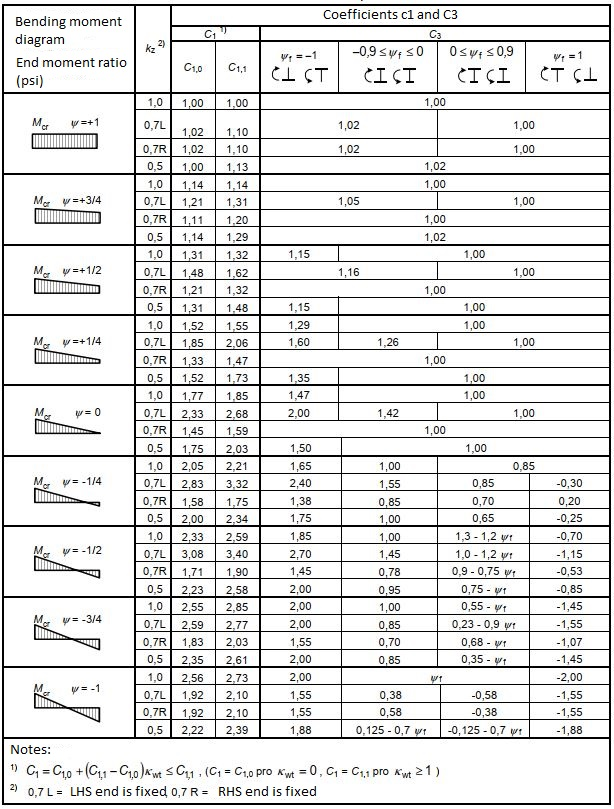

This procedure allows for symmetry about y axis

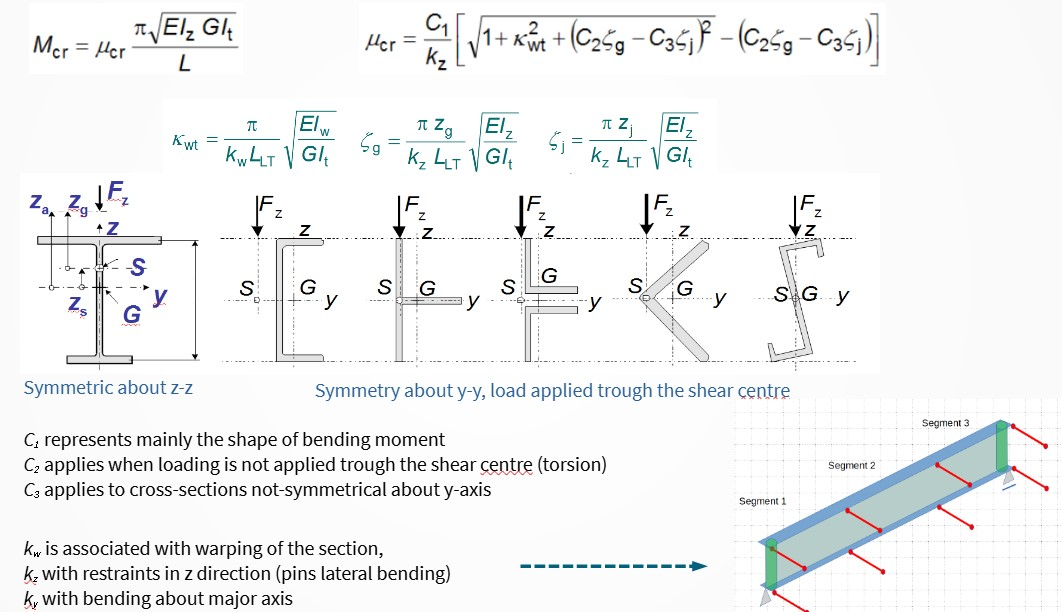

In [12]:
psi_f = 0       # effect of profile assymmetry
kz = 1          # simple support for bending
kw = 1 # warping not prevented
kappa_wt = (math.pi / kw / Lcrz) * math.sqrt(E * Iw / G / It)
zj = 0 # section is symmetric about the y axis, therefore zeta_j is also zero
zeta_j = math.pi * (zj) / kz / Lcrz * math.sqrt(E * Izeff / G / It)

In [13]:
print("kappa_wt                  = ", ("%2.3f" % kappa_wt), " [-]")
print("zeta_j                    = ", ("%2.3f" % zeta_j), " [-]")

kappa_wt                  =  5.275  [-]
zeta_j                    =  0.000  [-]


In [14]:
C10 = 1.14
C11 = 1.14
C1 = C10 + (C11 - C10) * kappa_wt
C3 = 1

In [15]:
# Dimensionless critical moment
mu_cr = C1 / kz * (math.sqrt(1 + kappa_wt**2)) 
M_cr = (mu_cr * math.pi * math.sqrt(E * Izeff * G * It) / Lcrz) / 1000000
# The relative slenderness
lambda_LT_dash = math.sqrt(Wyeff  * fy / (M_cr * 1000000))

curve = "B"
# imperfection factor
alphaLT=0.8 
if curve == "A0":
    alphaLT=0.13
if curve == "A":
    alphaLT=0.21
if curve == "B":
    alphaLT=0.34
if curve == "C":
    alphaLT=0.49
if curve == "D":
    alphaLT=0.76

PHI_LT = 0.5 * (1 + alphaLT * (lambda_LT_dash - 0.2) + lambda_LT_dash**2)
chi_LT = min(1, 1 / (PHI_LT + math.sqrt(PHI_LT**2 - lambda_LT_dash**2)))

In [16]:
print("lambda_LT_dash            = ", ("%2.3f" % lambda_LT_dash), " [-]")
print("PHI_LT                    = ", ("%2.3f" % PHI_LT), " [-]")
print("chi_LT                    = ", ("%2.3f" % chi_LT), " [-]")
print("mu_cr                     = ", ("%2.3f" % mu_cr), " [-]")
print("M_cr                      = ", ("%2.3f" % M_cr), " [kNm]")


lambda_LT_dash            =  0.781  [-]
PHI_LT                    =  0.904  [-]
chi_LT                    =  0.736  [-]
mu_cr                     =  6.121  [-]
M_cr                      =  129.509  [kNm]


### Interaction of bending moment and axial force

In [17]:
Cmy = 0.9
psi = 0    #Table NB.3.1 of CSN EN 1993-1-1
CmLT = 0.6 + psi * 0.4

In [18]:
NEd = axial_compression
MEd = max(bending_moment_eave, bending_moment_apex)
kyy = min(Cmy*(1 + (lambda_dash_y - 0.2)* NEd * gammaM1 / chi_y / NRd), Cmy * (1 + 0.8 * NEd * gammaM1 / chi_y / NRd))
kzy = max(1 - 0.1 * lambda_dash_z * NEd * gammaM1 / (CmLT - 0.25) / chi_z / NRd, 1 - 0.1 * NEd * gammaM1 / (CmLT - 0.25) / chi_z / NRd )
UF1 = NEd * gammaM1 / chi_y / NRd + kyy * MEd * gammaM1 / chi_LT / MyRd
UF2 = NEd * gammaM1 / chi_z / NRd + kzy * MEd * gammaM1 / chi_LT / MyRd

In [19]:
print("NEd                       = ", ("%2.3f" % NEd), " [kN]")
print("MEd                       = ", ("%2.3f" % MEd), " [kNm]")
print("kyy                       = ", ("%2.3f" % kyy), " [-]")
print("kzy                       = ", ("%2.3f" % kzy), " [-]")
print("UF1                       = ", ("%2.3f" % UF1), " [-]")
print("UF2                       = ", ("%2.3f" % UF2), " [-]")

NEd                       =  16.840  [kN]
MEd                       =  124.100  [kNm]
kyy                       =  0.900  [-]
kzy                       =  1.000  [-]
UF1                       =  0.834  [-]
UF2                       =  0.927  [-]
